<a href="https://colab.research.google.com/github/davidandres8/Ejercicios/blob/master/regresion_MLvalpo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Example: Predicting the Effective Temperature of Massive Stars
***

**Activity objective**: Use Python tools to experiment with a few (very simple) ML methods to predict the effective temperature of massive-star spectra.

**Data**: A subset of Be-star spectra generated by PhD (c) Daniela Turis (IFA-UV) using the ZPEKTR code.

When using ML, this problem is approached as a **regression** task.

More information about massive stars: https://massivestars.ifa.uv.cl/


## Python Libraries
***

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

import numpy as np
import time

from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns

## Data Download and Pandas
***
* Data generated with ZPEKTR by PhD candidate Daniela Turis (IFA-UV).
* You should obtain the set of spectra named: `df_ZPEKTR_limb_lineal.csv`

In [2]:
# Dataset provided by Daniela Turis, IFA-UV.

!gdown https://drive.google.com/uc?id=1m_GajQqDRcKrH8_ExG_0Yp_sQ4MrhZbN

Downloading...
From: https://drive.google.com/uc?id=1m_GajQqDRcKrH8_ExG_0Yp_sQ4MrhZbN
To: /content/df_ZPEKTR_limb_lineal.csv
100% 19.1M/19.1M [00:00<00:00, 80.2MB/s]


## Pandas dataframe

In [5]:
data=pd.read_csv('df_ZPEKTR_limb_lineal.csv')
data.head(10)

,4460.1,4460.2,4460.3,4460.4,4460.5,4460.6,4460.7,4460.8,4460.9,4461.0,...,vsini,M/M⊙,R/R⊙,V/Vc,L*,Ω/Ωc,Tpole,Teq,gpole,geq
0,0.996583,0.996529,0.996452,0.996362,0.996264,0.996160,0.996052,0.995942,0.995830,0.995717,...,228.0,15.0,5.79,0.75,4.105,0.912,28000.0,23690.0,4.20,4.02
1,0.996234,0.996208,0.996180,0.996141,0.996108,0.996074,0.996027,0.995962,0.995851,0.995678,...,309.0,17.0,5.75,0.77,4.230,0.928,30000.0,25014.0,4.25,4.06
2,0.997128,0.996958,0.996770,0.996573,0.996368,0.996163,0.995957,0.995746,0.995530,0.995321,...,254.0,10.0,8.42,0.65,3.857,0.836,19000.0,16859.0,3.63,3.50
3,0.993683,0.993541,0.993413,0.993277,0.993126,0.992986,0.992836,0.992683,0.992531,0.992366,...,351.0,12.0,5.31,0.68,3.351,0.860,18000.0,15772.0,4.12,3.98
4,0.995026,0.994887,0.994749,0.994607,0.994464,0.994324,0.994183,0.994040,0.993885,0.993727,...,310.0,12.0,6.35,0.65,3.778,0.842,21000.0,18578.0,3.96,3.83
5,0.996896,0.996804,0.996704,0.996607,0.996510,0.996415,0.996308,0.996211,0.996106,0.996004,...,165.0,12.0,7.85,0.71,3.885,0.884,21000.0,18137.0,3.83,3.67
6,0.994146,0.993977,0.993804,0.993624,0.993448,0.993264,0.993081,0.992898,0.992703,0.992507,...,373.0,16.0,6.38,0.68,3.603,0.864,19000.0,16608.0,4.09,3.94
7,0.995541,0.995130,0.994742,0.994369,0.994032,0.993717,0.993428,0.993170,0.992943,0.992730,...,145.0,5.0,7.34,0.55,3.146,0.747,13500.0,12401.0,3.45,3.35
8,0.995583,0.995478,0.995365,0.995246,0.995128,0.995000,0.994875,0.994742,0.994607,0.994464,...,374.0,14.0,7.48,0.75,4.069,0.916,23000.0,19391.0,3.89,3.71
9,0.996417,0.996345,0.996270,0.996192,0.996115,0.996030,0.995930,0.995814,0.995681,0.995539,...,323.0,16.0,8.51,0.68,4.259,0.863,24000.0,20992.0,3.84,3.69


In [9]:
data

,4460.1,4460.2,4460.3,4460.4,4460.5,4460.6,4460.7,4460.8,4460.9,4461.0,...,vsini,M/M⊙,R/R⊙,V/Vc,L*,Ω/Ωc,Tpole,Teq,gpole,geq
0,0.996583,0.996529,0.996452,0.996362,0.996264,0.996160,0.996052,0.995942,0.995830,0.995717,...,228.0,15.0,5.79,0.75,4.105,0.912,28000.0,23690.0,4.20,4.02
1,0.996234,0.996208,0.996180,0.996141,0.996108,0.996074,0.996027,0.995962,0.995851,0.995678,...,309.0,17.0,5.75,0.77,4.230,0.928,30000.0,25014.0,4.25,4.06
2,0.997128,0.996958,0.996770,0.996573,0.996368,0.996163,0.995957,0.995746,0.995530,0.995321,...,254.0,10.0,8.42,0.65,3.857,0.836,19000.0,16859.0,3.63,3.50
3,0.993683,0.993541,0.993413,0.993277,0.993126,0.992986,0.992836,0.992683,0.992531,0.992366,...,351.0,12.0,5.31,0.68,3.351,0.860,18000.0,15772.0,4.12,3.98
4,0.995026,0.994887,0.994749,0.994607,0.994464,0.994324,0.994183,0.994040,0.993885,0.993727,...,310.0,12.0,6.35,0.65,3.778,0.842,21000.0,18578.0,3.96,3.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10686,0.997252,0.997177,0.997096,0.997015,0.996925,0.996834,0.996746,0.996653,0.996512,0.996266,...,181.0,10.0,8.84,0.71,3.835,0.884,19000.0,16409.0,3.63,3.47
10687,0.996881,0.996865,0.996835,0.996777,0.996702,0.996621,0.996535,0.996448,0.996362,0.996273,...,220.0,15.0,5.62,0.66,4.178,0.845,29000.0,25609.0,4.20,4.06
10688,0.995203,0.995078,0.994956,0.994825,0.994694,0.994560,0.994422,0.994278,0.994129,0.993986,...,329.0,14.0,7.39,0.66,3.914,0.848,21000.0,18515.0,3.89,3.76
10689,0.993157,0.992989,0.992820,0.992641,0.992453,0.992275,0.992084,0.991878,0.991684,0.991485,...,346.0,16.0,5.31,0.63,3.618,0.816,21000.0,18802.0,4.24,4.12


### Building $X$ matrix and $y$ vector

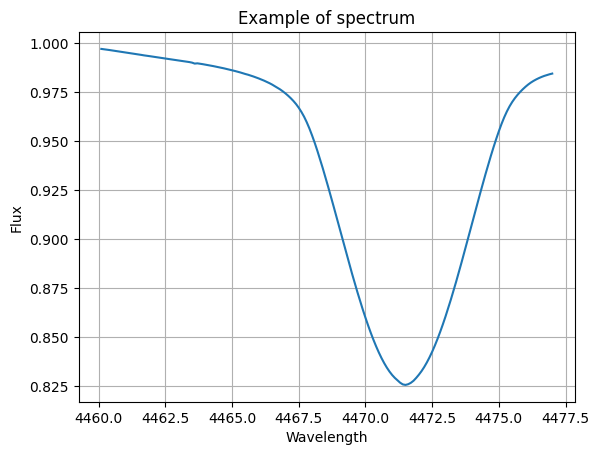

In [21]:
X = data.iloc[:,0:170] # X matrix containing spectral lines (flux)
y_input = data.iloc[:,170:176] # input parameters
y_output = data.iloc[:,176:] # output parameters
y = data.iloc[:,176:177] # y matrix containing the values we want to predict
lambdas = np.array(data.columns[:-18]).astype("float")

plt.figure()
plt.plot(lambdas, X.iloc[2,:])
plt.title("Example of spectrum")
plt.xlabel("Wavelength")
plt.ylabel("Flux")
plt.grid()
plt.show()

In [22]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state=0)

In [23]:
X_train.shape, y_train.shape

((6841, 170), (6841, 1))

## Linear regression

Linear Regression Results:
MSE: 50993.62
MAE: 166.14
R²: 0.997


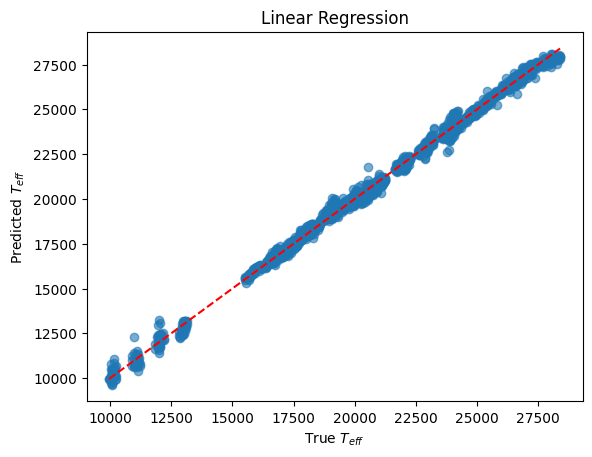

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

print("Linear Regression Results:")
print(f"MSE: {mean_squared_error(y_test, y_pred):.2f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred):.2f}")
print(f"R²: {r2_score(y_test, y_pred):.3f}")

plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("True $T_{eff}$")
plt.ylabel("Predicted $T_{eff}$")
plt.title("Linear Regression")
plt.show()

## Decision Tree

Decision Tree Results:
MSE: 727808.41
MAE: 632.76
R²: 0.956


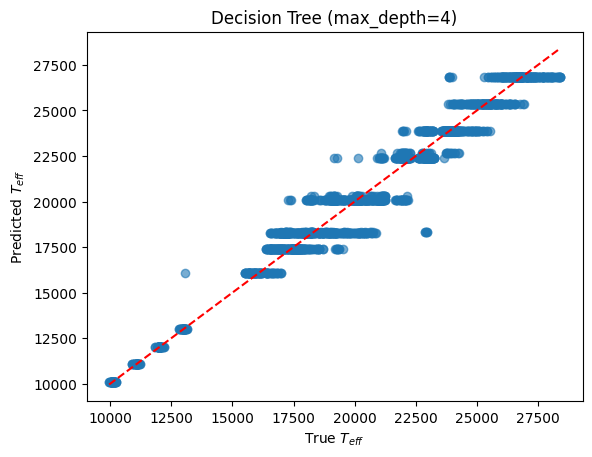

In [25]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(max_depth=4, random_state=42)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)

print("Decision Tree Results:")
print(f"MSE: {mean_squared_error(y_test, y_pred):.2f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred):.2f}")
print(f"R²: {r2_score(y_test, y_pred):.3f}")

plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("True $T_{eff}$")
plt.ylabel("Predicted $T_{eff}$")
plt.title("Decision Tree (max_depth=4)")
plt.show()

## Random Forest

/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Random Forest Results:
MSE: 22187.44
MAE: 80.66
R²: 0.999


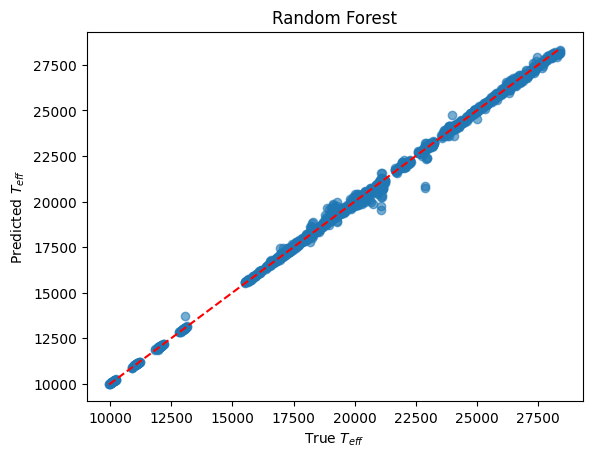

In [26]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=10, random_state=42)
#n_estimators = numero de trees, diferentes caminos
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print("Random Forest Results:")
print(f"MSE: {mean_squared_error(y_test, y_pred):.2f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred):.2f}")
print(f"R²: {r2_score(y_test, y_pred):.3f}")

plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("True $T_{eff}$")
plt.ylabel("Predicted $T_{eff}$")
plt.title("Random Forest")
plt.show()

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor(random_state=42)
gb.fit(X_train, y_train)
y_pred2 = gb.predict(X_test)

print("Gradient Boosting Results:")
print(f"MSE: {mean_squared_error(y_test, y_pred2):.2f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred2):.2f}")
print(f"R²: {r2_score(y_test, y_pred2):.3f}")

plt.scatter(y_test, y_pred2, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("True $T_{eff}$")
plt.ylabel("Predicted $T_{eff}$")
plt.title("Gradient Boosting")
plt.show()

/usr/local/lib/python3.12/dist-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
